**Imports and workspace setting**

In [2]:
import csv
import math
import os

import numpy as np
import pandas as pd

import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
%matplotlib inline

import scipy.stats as stat

**Loading data and preview**

In [3]:
my_data = pd.read_csv('PSID.csv')
my_data.head()

,Seq No,intnum,persnum,age,educatn,earnings,hours,kids,married
0,1,4,4,39,12.0,77250,2940,2,married
1,2,4,6,35,12.0,12000,2040,2,divorced
2,3,4,7,33,12.0,8000,693,1,married
3,4,4,173,39,10.0,15000,1904,2,married
4,5,5,2,47,9.0,6500,1683,5,married


**Describing data set**

In [4]:
print('Data set size = ', my_data.shape)
print('Dimension = ', my_data.ndim)

Data set size =  (4856, 9)
Dimension =  2


In [5]:
my_data.dtypes

Seq No        int64
intnum        int64
persnum       int64
age           int64
educatn     float64
earnings      int64
hours         int64
kids          int64
married      object
dtype: object

In [6]:
my_data.describe()

,Seq No,intnum,persnum,age,educatn,earnings,hours,kids
count,4856.000000,4856.000000,4856.000000,4856.000000,4855.000000,4856.000000,4856.000000,4856.000000
mean,2428.500000,4598.101318,59.213550,38.462932,16.377137,14244.506178,1235.334843,4.481260
std,1401.950784,2761.971174,79.748556,5.595116,18.449502,15985.447449,947.175837,14.887856
min,1.000000,4.000000,1.000000,30.000000,0.000000,0.000000,0.000000,0.000000
25%,1214.750000,1905.000000,2.000000,34.000000,12.000000,85.000000,32.000000,1.000000
50%,2428.500000,5464.000000,4.000000,38.000000,12.000000,11000.000000,1517.000000,2.000000
75%,3642.250000,6655.000000,170.000000,43.000000,14.000000,22000.000000,2000.000000,3.000000
max,4856.000000,9306.000000,205.000000,50.000000,99.000000,240000.000000,5160.000000,99.000000


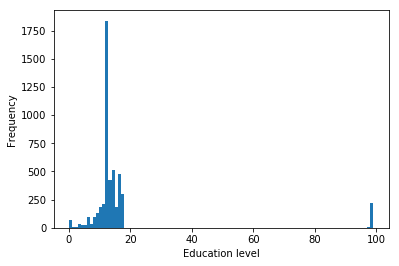

In [7]:
my_data['educatn'].plot(kind='hist', bins=100)
plt.xlabel('Education level')

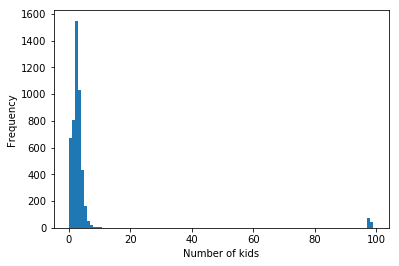

In [8]:
my_data['kids'].plot(kind='hist', bins=100)
plt.xlabel('Number of kids')

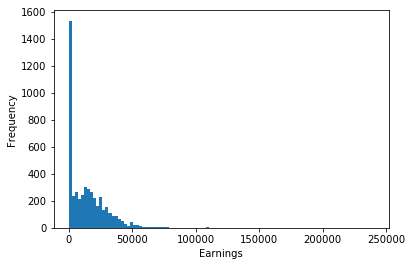

In [9]:
my_data['earnings'].plot(kind='hist', bins=100)
plt.xlabel('Earnings')

**Remove invalid data (limiting kids <=20 and education <= 20 and earnings >= 150000)**

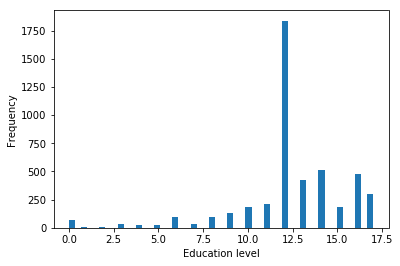

In [10]:
my_data = my_data.drop(my_data[my_data.educatn > 20].index)
my_data['educatn'].plot(kind='hist', bins=50)
plt.xlabel('Education level')

In [11]:
my_data.shape

(4631, 9)

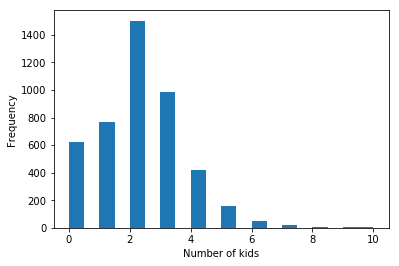

In [12]:
my_data = my_data.drop(my_data[my_data.kids > 20].index)
my_data['kids'].plot(kind='hist', bins=20)
plt.xlabel('Number of kids')

In [13]:
my_data.shape

(4529, 9)

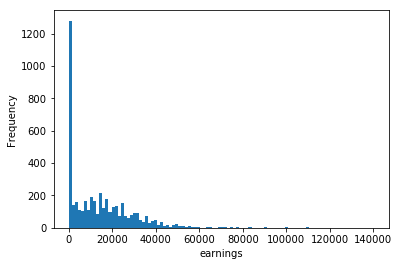

In [14]:
my_data = my_data.drop(my_data[my_data.earnings > 150000].index)
my_data['earnings'].plot(kind='hist', bins=100)
plt.xlabel('earnings')

In [15]:
my_data.shape

(4526, 9)

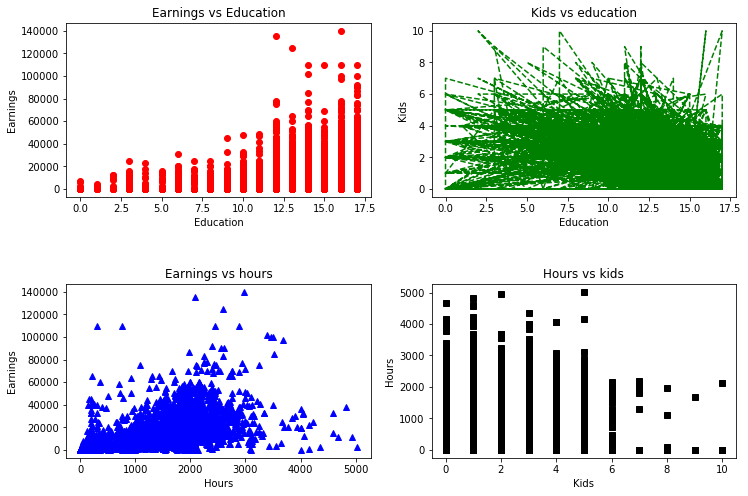

In [16]:
plt.figure(figsize=(12, 8))
plt.subplots_adjust(hspace=0.5)
plt.subplot(2,2,1)
plt.plot(my_data['educatn'], my_data['earnings'], 'ro')
plt.title('Earnings vs Education')
plt.xlabel("Education")
plt.ylabel("Earnings")

plt.subplot(2,2,2)
plt.plot(my_data['educatn'], my_data['kids'], 'g--')
plt.title('Kids vs education')
plt.xlabel("Education")
plt.ylabel("Kids")

plt.subplot(2,2,3)
plt.plot(my_data['hours'], my_data['earnings'], 'b^')
plt.title('Earnings vs hours')
plt.xlabel("Hours")
plt.ylabel("Earnings")

plt.subplot(2,2,4)
plt.plot(my_data['kids'], my_data['hours'], 'ks')
plt.title('Hours vs kids')
plt.xlabel("Kids")
plt.ylabel("Hours")


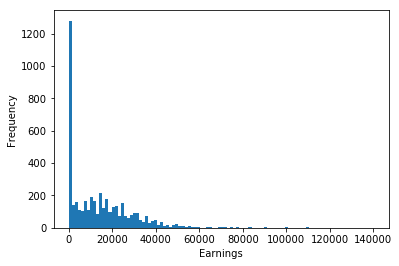

In [18]:
my_data['earnings'].plot(kind='hist', bins=100)
plt.xlabel('Earnings')

**Identifying correlation between variables**

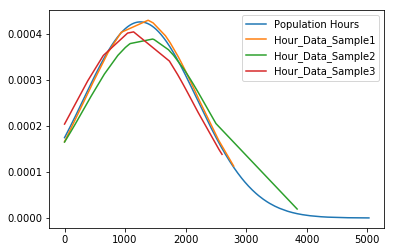

In [19]:
Population = my_data['hours'].sort_values();
PopulationMean_Hours = Population.mean()
PopulationStd_Hours = Population.std()

PopulationHours = stat.norm.pdf(Population, PopulationMean_Hours, PopulationStd_Hours)
plt.plot(Population, PopulationHours, label='Population Hours')

hour_data_sample1 = my_data['hours'].sample(30);
hour_data_sorted_sample1 = hour_data_sample1.sort_values();
hour_data_fit1 = stat.norm.pdf(hour_data_sorted_sample1, hour_data_sample1.mean(), hour_data_sample1.std())
plt.plot(hour_data_sorted_sample1, hour_data_fit1, label='Hour_Data_Sample1')

hour_data_sample2 = my_data['hours'].sample(30);
hour_data_sorted_sample2 = hour_data_sample2.sort_values();
hour_data_fit2 = stat.norm.pdf(hour_data_sorted_sample2, hour_data_sample2.mean(), hour_data_sample2.std())
plt.plot(hour_data_sorted_sample2, hour_data_fit2, label='Hour_Data_Sample2')

hour_data_sample3 = my_data['hours'].sample(30);
hour_data_sorted_sample3 = hour_data_sample3.sort_values();
hour_data_fit3 = stat.norm.pdf(hour_data_sorted_sample3, hour_data_sample3.mean(), hour_data_sample3.std())
plt.plot(hour_data_sorted_sample3, hour_data_fit3, label='Hour_Data_Sample3')

plt.legend()

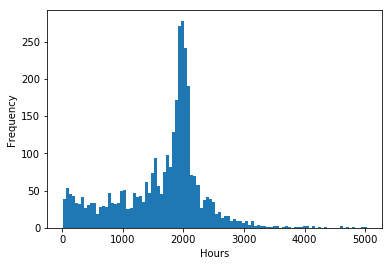

In [21]:
my_data = my_data.drop(my_data[my_data.hours == 0].index)
my_data['hours'].plot(kind='hist', bins=100)
plt.xlabel('Hours')

#x = np.linspace(10,5000,5)
#x = np.linspace(PopulationMean_Hours - 3*PopulationSqrt_Hours, PopulationMean_Hours + 3*PopulationSqrt_Hours, 100)
#plt.plot(x,mlab.normpdf(x, PopulationMean_Hours, PopulationSqrt_Hours), label='Population Hours')
#plt.plot(x,mlab.normpdf(x, m, sq), label='Sample1 = 500')
#plt.show()



#plt.figure()
#x = np.linspace(PopulationMean_Hours - 3*PopulationSqrt_Hours, PopulationMean_Hours + 3*PopulationSqrt_Hours, 100)
#plt.plot(x,mlab.normpdf(x, PopulationMean_Hours, PopulationSqrt_Hours), label='Population ')
#plt.figure()
#x = np.linspace(m1 - 3*sq1, m1 + 3*sq1, 100)
#plt.plot(x,mlab.normpdf(x, m1, sq1), label='Sample =50 ')
#plt.plot(my_data['hours'])

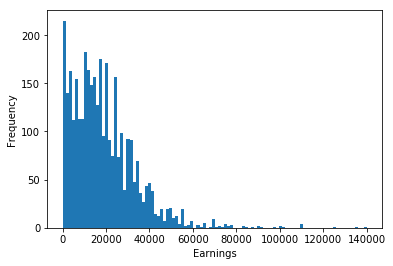

In [20]:
#my_data['earnings'].plot(kind='hist', bins=100)
#plt.xlabel('Earnings')

my_data = my_data.drop(my_data[my_data.earnings == 0].index)
my_data['earnings'].plot(kind='hist', bins=100)
plt.xlabel('Earnings')

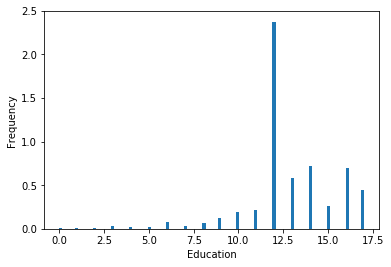

In [22]:
my_data = my_data.drop(my_data[my_data.educatn > 20].index)
my_data['educatn'].plot(kind='hist', bins=100,normed=True)
plt.xlabel('Education')


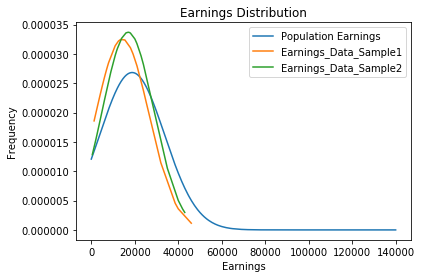

In [22]:
Population = my_data['earnings'].sort_values();
PopulationMean_Earnings = Population.mean()
PopulationStd_Earnings = Population.std()

PopulationEarnings = stat.norm.pdf(Population, PopulationMean_Earnings, PopulationStd_Earnings)
plt.plot(Population, PopulationEarnings, label='Population Earnings')

earnings_data_sample1 = my_data['earnings'].sample(30);
earnings_data_sorted_sample1 = earnings_data_sample1.sort_values();
earnings_data_fit1 = stat.norm.pdf(earnings_data_sorted_sample1, earnings_data_sample1.mean(), earnings_data_sample1.std())
plt.plot(earnings_data_sorted_sample1, earnings_data_fit1, label='Earnings_Data_Sample1')

earnings_data_sample2 = my_data['earnings'].sample(30);
earnings_data_sorted_sample2 = earnings_data_sample2.sort_values();
earnings_data_fit2 = stat.norm.pdf(earnings_data_sorted_sample2, earnings_data_sample2.mean(), earnings_data_sample2.std())
plt.plot(earnings_data_sorted_sample2, earnings_data_fit2, label='Earnings_Data_Sample2')

plt.title("Earnings Distribution")
plt.xlabel("Earnings")
plt.ylabel("Frequency")
plt.legend()

Using Log to remove skewness

In [24]:
high = my_data[my_data.earnings> 60000].hours.sample(30).sort_values()
Hours_of_high_salary = np.log(high)
Hours_of_high_salary.describe()

count    30.000000
mean      7.742363
std       0.341246
min       6.638568
25%       7.666830
50%       7.800764
75%       7.919174
max       8.166216
Name: hours, dtype: float64

In [25]:
low = my_data[my_data.earnings<= 60000].hours.sample(30).sort_values()
low = low.drop(low[my_data.earnings == 0].index)
Hours_of_low_salary = np.log(low)
Hours_of_low_salary.describe()

count    30.000000
mean      7.198382
std       0.805150
min       4.584967
25%       7.300304
50%       7.520231
75%       7.619110
max       7.996654
Name: hours, dtype: float64

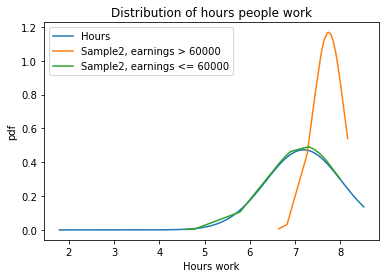

In [26]:
Pop = my_data['hours'].sort_values();
Pop = Pop.dropna(how='any')
Pop = Pop.drop(Pop[my_data.hours == 0].index)
Population = np.log(Pop)

PopulationHours = stat.norm.pdf(Population, Population.mean(), Population.std())
plt.plot(Population, PopulationHours, label='Hours')

hour_data_fit1 = stat.norm.pdf(Hours_of_high_salary, Hours_of_high_salary.mean(), Hours_of_high_salary.std())
plt.plot(Hours_of_high_salary, hour_data_fit1, label='Sample2, earnings > 60000')

hour_data_fit2 = stat.norm.pdf(Hours_of_low_salary, Hours_of_low_salary.mean(), Hours_of_low_salary.std())
plt.plot(Hours_of_low_salary, hour_data_fit2, label='Sample2, earnings <= 60000')

plt.title('Distribution of hours people work')
plt.xlabel('Hours work')
plt.ylabel('pdf')
plt.legend()

Using square root to remove skewness

In [27]:
high = my_data[my_data.earnings> 60000].hours.sample(30).sort_values()
Hours_of_high_salary = np.sqrt(high)
Hours_of_high_salary.describe()

count    30.000000
mean     47.258823
std       9.563057
min      14.282857
25%      44.681816
50%      48.526127
75%      52.107626
max      60.621778
Name: hours, dtype: float64

In [28]:
low = my_data[my_data.earnings<= 60000].hours.sample(30).sort_values()
low = low.drop(low[my_data.earnings == 0].index)
Hours_of_low_salary = np.sqrt(low)
Hours_of_low_salary.describe()

count    30.000000
mean     38.314698
std      10.351608
min      10.954451
25%      32.941683
50%      43.473978
75%      45.149381
max      53.441557
Name: hours, dtype: float64

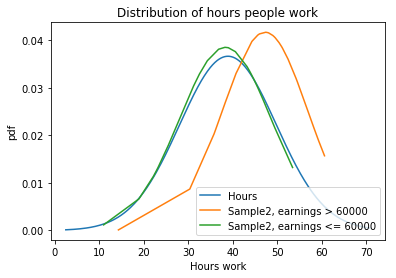

In [29]:
Pop = my_data['hours'].sort_values();
Pop = Pop.dropna(how='any')
Pop = Pop.drop(Pop[my_data.hours == 0].index)
Population = np.sqrt(Pop)

PopulationHours = stat.norm.pdf(Population, Population.mean(), Population.std())
plt.plot(Population, PopulationHours, label='Hours')

hour_data_fit1 = stat.norm.pdf(Hours_of_high_salary, Hours_of_high_salary.mean(), Hours_of_high_salary.std())
plt.plot(Hours_of_high_salary, hour_data_fit1, label='Sample2, earnings > 60000')

hour_data_fit2 = stat.norm.pdf(Hours_of_low_salary, Hours_of_low_salary.mean(), Hours_of_low_salary.std())
plt.plot(Hours_of_low_salary, hour_data_fit2, label='Sample2, earnings <= 60000')

plt.title('Distribution of hours people work')
plt.xlabel('Hours work')
plt.ylabel('pdf')
plt.legend()